<a href="https://colab.research.google.com/github/smmasruk/DigitalElectronics/blob/master/Experiment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHY 305 (Digital Electronics)

> ## Experiment 2: Boolean algebra.
S.M.Masruk Uddin \\
**ID:1820855**

In [ ]:
!pip install wavedrom

In [17]:
import wavedrom
from IPython.display import SVG, display


Given Expression is:

$$X=(A + \bar{B} + C) . (\bar{B} + C + \bar{D}) . (A + \bar{B} + \bar{C} + D)$$

In [ ]:
#This function takes the gate as a function and prints the truth table. 
def printTruthTable(f):
    ip=[0,1]
    print("A","B","C","D",":","X")
    for i in ip:
        for j in ip:
            for k in ip:
                for l in ip:
                  print(i,j,k,l,":",int(f(i,j,k,l)))

#defining x in a function
def X(A,B,C,D):
  return ((A or not(B) or C) and (not(B) or C or not(D)) and (A or not(B) or not(C) or D) )



In [ ]:
printTruthTable(X)

A B C D : X
0 0 0 0 : 1
0 0 0 1 : 1
0 0 1 0 : 1
0 0 1 1 : 1
0 1 0 0 : 0
0 1 0 1 : 0
0 1 1 0 : 0
0 1 1 1 : 1
1 0 0 0 : 1
1 0 0 1 : 1
1 0 1 0 : 1
1 0 1 1 : 1
1 1 0 0 : 1
1 1 0 1 : 0
1 1 1 0 : 1
1 1 1 1 : 1


From the above code block I got a truth table that I can use to find the sop and pos of $X$. \

$$  
A - B - C - D  :  X - SOP/POS\\
0 - 0 - 0 - 0  :  1 - \bar{A}\bar{B}\bar{C} \bar{D} \\
0 - 0 - 0 - 1  :  1 - \bar{A}\bar{B}\bar{C} D \\
0 - 0 - 1 - 0  :  1 - \bar{A}\bar{B} C \bar{D} \\
0 - 0 - 1 - 1  :  1 - \bar{A}\bar{B} C  D \\
0 - 1 - 0 - 0  :  0 -A+\bar{B}+C+D \\
0 - 1 - 0 - 1  :  0 -A+\bar{B}+C+\bar{D} \\
0 - 1 - 1 - 0  :  0 - A+\bar{B}+\bar{C}+D\\
0 - 1 - 1 - 1  :  1 -\bar{A}BCD \\
1 - 0 - 0 - 0  :  1 - A\bar{B}\bar{C} \bar{D} \\
1 - 0 - 0 - 1  :  1 - A\bar{B}\bar{C} D\\
1 - 0 - 1 - 0  :  1 -A\bar{B}C\bar{D} \\
1 - 0 - 1 - 1  :  1 - A\bar{B}CD \\
1 - 1 - 0 - 0  :  1 -AB\bar{C}\bar{D} \\
1 - 1 - 0 - 1  :  0 - \bar{A}+\bar{B}+C+\bar{D}\\
$$


Therefore SOP is :$$
(\bar{A} \bar{B} \bar{C} \bar{D})
+( \bar{A} \bar{B} \bar{C} D)
+( \bar{A} \bar{B}C \bar{D})
+( \bar{A} \bar{B}CD)
+( \bar{A} BCD)
+( A \bar{B} \bar{C} \bar{D})
+( A \bar{B} \bar{C}D)
+( A \bar{B}C \bar{D})
+( A \bar{B}CD)
+( AB \bar{C} \bar{D}) $$


And the POS is:    $$
(A+\bar{B}+C+D)
.(A+\bar{B}+C+\bar{D})
.(A+\bar{B}+\bar{C}+D)
.(\bar{A}+\bar{B}+C+\bar{D})
$$


#Circuit Diagram of the SOP#

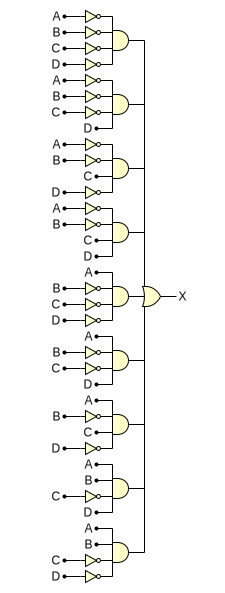

In [44]:
wavedrom.render("""
{ "assign":[
  ["X",
    ["|",
      ["&", ["~","A"], ["~","B"], ["~","C"], ["~","D"]],
     ["&", ["~","A"],[ "~","B"], ["~","C"], "D"],
     ["&", ["~","A"],["~","B"],"C", ["~","D"]],
      ["&", ["~","A"],["~","B"],"C","D"],
      ["&", "A",["~","B"],["~","C"], ["~","D"]],
      ["&", "A",["~","B"],["~","C"], "D"],
      ["&", "A",["~","B"],"C", ["~","D"]],
      ["&", "A","B",["~","C"],"D"],
      ["&", "A","B",["~","C"],["~","D"] ]
    ]
  ]
]}""")

#Circuit Diagram of the POS

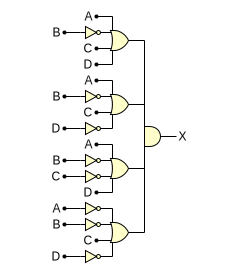

In [37]:
wavedrom.render("""
{ "assign":[
  ["X",
    ["&",
      ["|", "A",["~","B"],"C", "D"],
      ["|", "A",["~","B"],"C", ["~","D"]],
      ["|", "A",["~","B"],["~","C"], "D"],
      ["|", ["~","A"],["~","B"],"C", ["~","D"]]
    ]
  ]
]}""")